In [32]:
#Impoting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mising value ratio

In [33]:
train = pd.read_csv('Train.txt')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [35]:
train.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [36]:
a = train.isnull().mean()*100
variables = train.columns
variable=[]
for i in range(0,12):
    if a[i]<=20: #setting the threshold to 20 percent
        variable.append(variables[i])
variable

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

# Low variance filter

In [37]:

train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [38]:
train.isnull().mean()*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [39]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [40]:
numeric = train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable=[]
for i in range(0,len(var)):
    if var[i]>=10: #Setting the threshold at 10 percent
        variable.append(numeric[i])
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

# High correlation filter

In [41]:
df = train.drop('Item_Outlet_Sales',1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


The variable are not highly correlated

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
df = df.drop(['Item_Identifier','Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)


In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [44]:
df = pd.get_dummies(df)

In [45]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [46]:
model.fit(df,train.Item_Outlet_Sales)

C:\Users\Santhosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

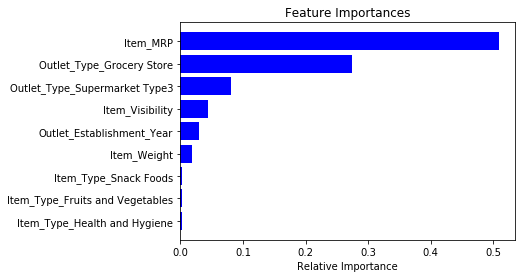

In [47]:
#Plot the feature importance to see the important features
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:] #Top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

In [49]:
Fit.shape

(8523, 5)

# Backward Feature Elimination

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets 

lreg = LinearRegression()
rfe = RFE(lreg,10)
rfe = rfe.fit(df,train.Item_Outlet_Sales)

In [51]:
rfe.ranking_

array([25,  1, 16, 14,  6, 24,  5, 11,  1, 19, 23, 22, 10,  2, 15,  1, 21,
       17,  3, 20,  1,  1, 18,  1,  1,  9, 13,  7, 12, 26,  8,  1,  1,  4,
        1])

In [52]:
rfe.support_

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True])

# Forward Feature Selection

In [53]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df, train.Item_Outlet_Sales)

In [54]:
#The output is an array of p value and f values 
ffs

(array([8.00638865e-01, 1.43345451e+02, 4.04945623e+03, 2.06215699e+01,
        1.30806126e+00, 1.22585958e+00, 4.36138028e+00, 3.41026049e-01,
        1.95567521e+00, 1.25710921e+01, 4.63353942e-02, 1.84715461e-01,
        4.64996489e-01, 6.68692267e-01, 7.66102777e-01, 5.74173896e+00,
        1.33379794e-01, 5.58240389e+00, 2.10122944e+00, 7.64508603e-02,
        3.85572723e+00, 4.64101498e-01, 4.42472434e+00, 4.92726368e+00,
        1.92759704e+00, 4.98080532e+00, 4.84013114e+01, 8.33163800e+01,
        1.06854461e+02, 2.90220724e+01, 1.83660511e+01, 1.73932135e+03,
        1.02009171e+02, 1.23601667e+01, 9.13656782e+02]),
 array([3.70927701e-001, 9.04128718e-033, 0.00000000e+000, 5.67308211e-006,
        2.52778104e-001, 2.68245018e-001, 3.67921182e-002, 5.59253023e-001,
        1.62012996e-001, 3.93861711e-004, 8.29572434e-001, 6.67362647e-001,
        4.95316603e-001, 4.13530779e-001, 3.81450067e-001, 1.65878107e-002,
        7.14962237e-001, 1.81641436e-002, 1.47217554e-001, 7.8

In [55]:
#taking f value > 10
variable = []
for i in range(0, len(df.columns)-1):
    if ffs[0][i]>10:
        variable.append(df.columns[i])

In [56]:
#the top 10 varible
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

# Factor Analysis

In [57]:
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train/*.png')]

In [58]:
images = np.array(images)

In [59]:
images.shape

(60000, 28, 28, 3)

In [60]:
image = []

for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)
image.shape

(60000, 2352)

In [61]:
train = pd.read_csv('train.csv')
feat_cols  = ['pixel'+str(i) for i in range(image.shape[1])]
df = pd.DataFrame(image, columns=feat_cols)
df['label'] = train['label']
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Decomposing the dataset with factor analysis
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components=3).fit_transform(df[feat_cols].values)

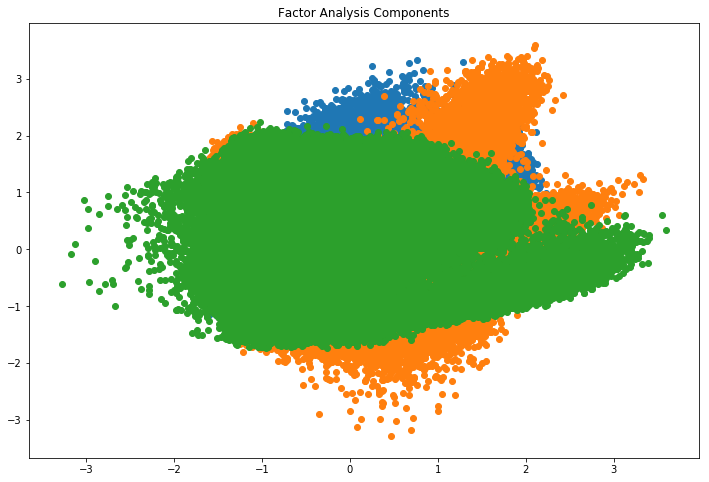

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

In [64]:
FA.shape

(60000, 3)

# Principal Component Analysis

<Figure size 432x288 with 0 Axes>

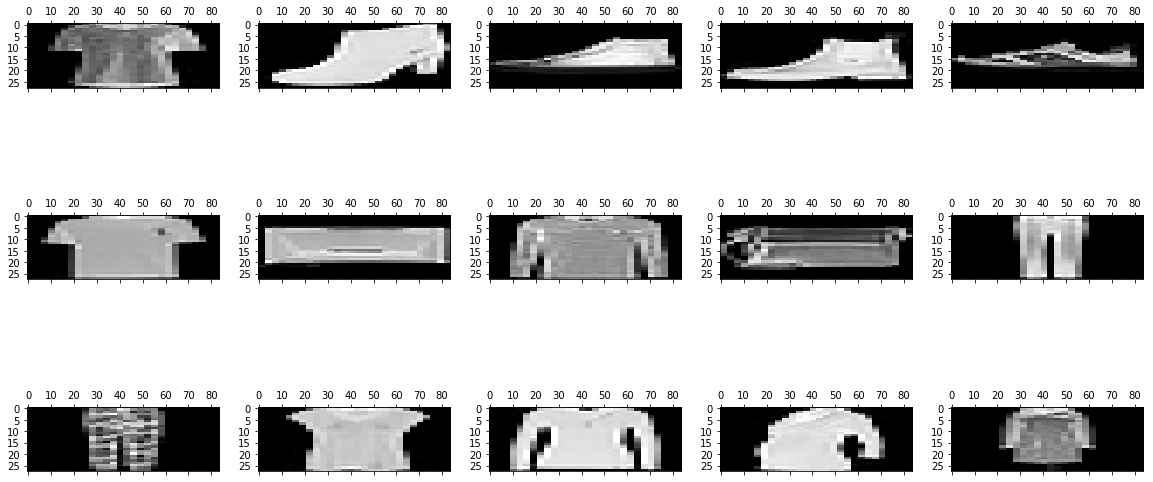

In [65]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28*3)).astype(float))

In [66]:
#Implementing the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

No handles with labels found to put in legend.


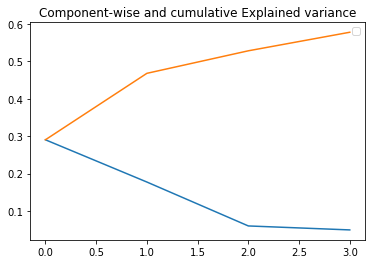

In [68]:
#visualize using the explained_variance_ratio_

plt.plot(range(4),pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title('Component-wise and cumulative Explained variance')
plt.legend()

Text(0.5, 0.98, '4-Component PCA')

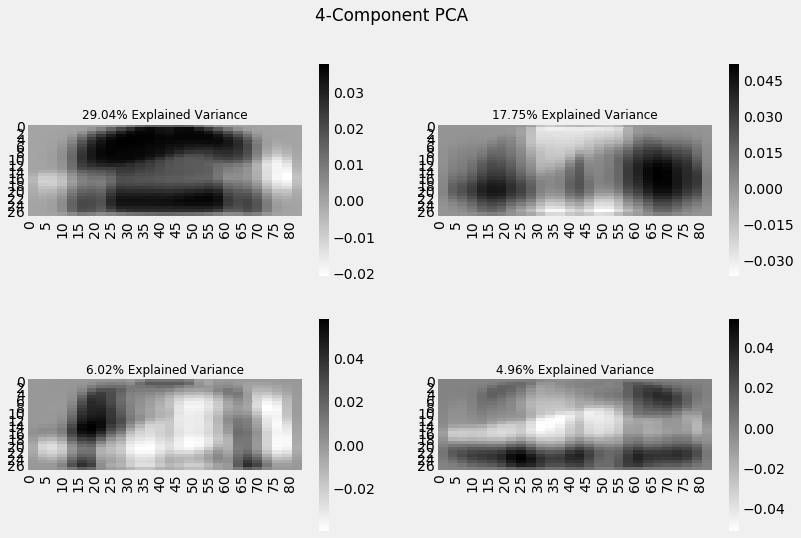

In [69]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

# Singular Vaue Decompisition(SVD)

In [70]:
#This will convert the original values into three constituent matries. This will remove redundant features.
#Uses Eigen vaues and Eigenvectors to determine the three matrices

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

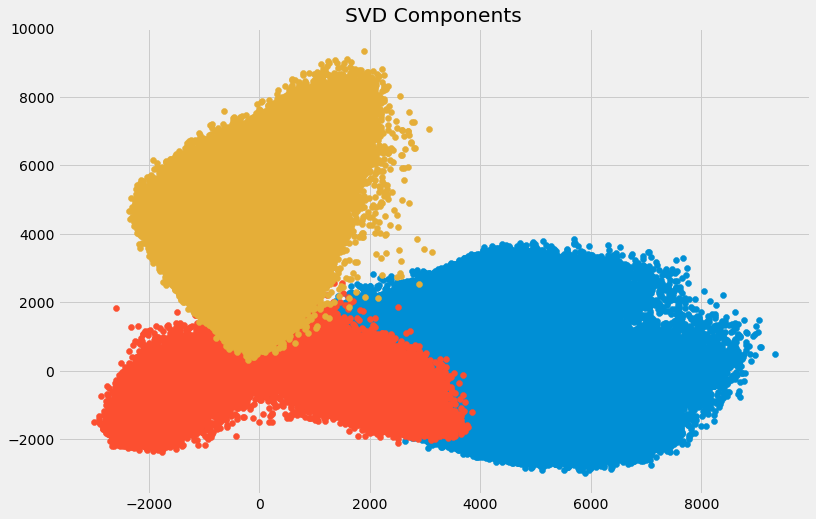

In [72]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2], svd[:,0])

# Independant component Analysis(ICA) 

In [73]:
'''PCA looks for uncorrelated factors, ICA looks for independant factors
'''
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=3, random_state=12)
X = ICA.fit_transform(df[feat_cols].values)

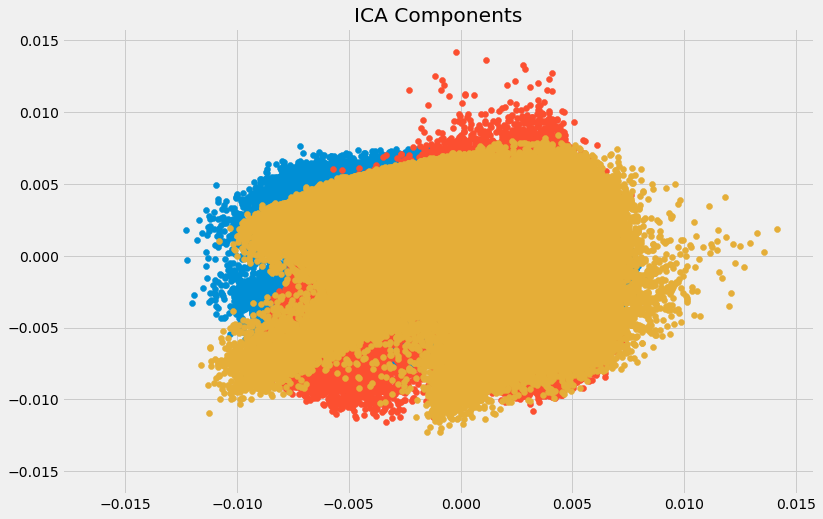

In [74]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

Methods Based on Projection techniques

# ISOMAP

In [78]:
from sklearn import manifold
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df[feat_cols][:6000].values)

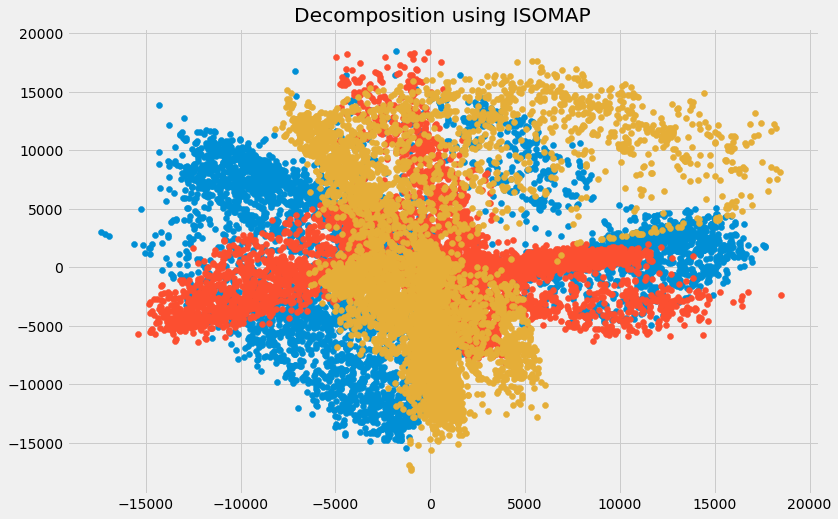

In [79]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [83]:
'''
Search for Patterns in a non linear way  - maps both local and global structures
It calculates the probability similarity of points in high dimentional space and low dimentional space
'''

from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df[feat_cols][:6000].values)

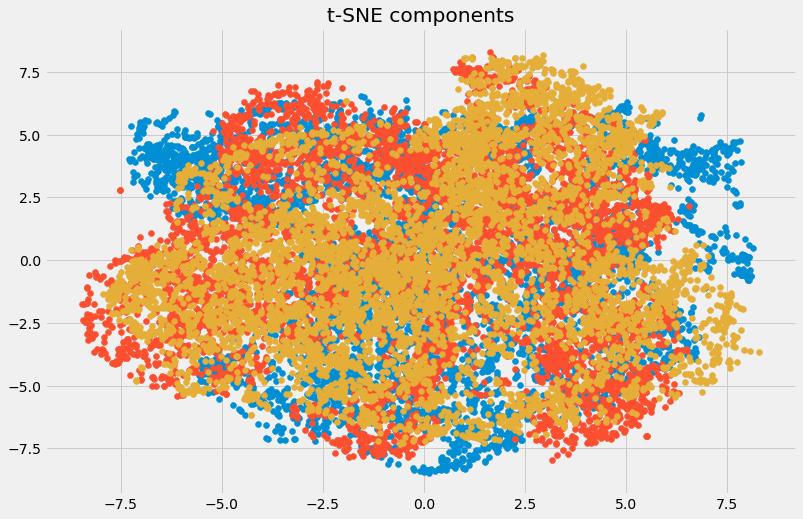

In [84]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

# UMAP (Uniform Manifold Approximation and Projection)

In [90]:
'''
t-SNE works well with large datasets but has limitations - 
1. Loss of large scale information
2. Slow computation time
3. Inability to meaningfully represent large datsets

UMAP is reduces these - it uses KNN and optimises with Sc=tochatic gradient descent
'''
import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df[feat_cols][:6000].values)

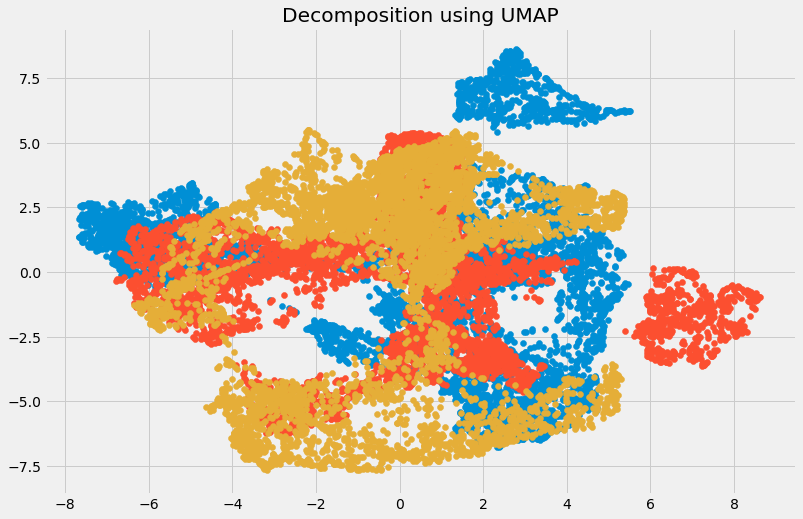

In [91]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])

In [93]:
'''
Missing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them

Low Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped

High Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly

Random Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction

Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets

Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor

Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible

Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components

ISOMAP: We use this technique when the data is strongly non-linear

t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well

UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE
'''

'\nMissing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them\n\nLow Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped\n\nHigh Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly\n\nRandom Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction\n\nBoth Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and ar